#Vektörler

In [ ]:
import numpy as np

x=np.array(7) #skaler bir sayı
x


array(7)

In [ ]:
x.ndim

0

In [ ]:
x=np.array([7,14,24]) #bir satır vektörü
x


array([ 7, 14, 24])

In [ ]:
x.ndim  #boyutu 1. Boyutu 2 olduğu andan itibaren bu bir matrise dönüşmüş olur


1

#Matrisler


In [ ]:
x=np.array([[7,14,21],
            [7,14,21],
            [7,14,21]])

x

array([[ 7, 14, 21],
       [ 7, 14, 21],
       [ 7, 14, 21]])

In [ ]:
x.ndim # boyutu 2. Artık bir vektör değil matris.

2

#Tensörler

In [ ]:
x=np.array([[[7,14,21],
            [7,14,21]],
           [[87,89,93],
           [87,89,93]],
           [[10,4,7],
            [10,4,7]]])

x

array([[[ 7, 14, 21],
        [ 7, 14, 21]],

       [[87, 89, 93],
        [87, 89, 93]],

       [[10,  4,  7],
        [10,  4,  7]]])

In [ ]:
x.ndim #boyut >2 itibariyle tensör oluyor

3

#Görüntü verisinden örnek örnek gösterim

In [ ]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
print(train_images.ndim)
print(train_images.shape)  #60000 adet görüntü 28*28 piksel boyutlarında

3
(60000, 28, 28)


In [ ]:
print(test_images.ndim)
print(test_images.shape)  #10000 adet görüntü 28*28 piksel boyutlarında

3
(10000, 28, 28)


In [ ]:
print(train_images.dtype)

uint8


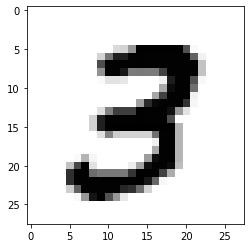

In [ ]:
# verisetinden bir örnek görüntüledik
digit=train_images[7]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
#veri kümesi içinden bir parçanın alınması
dizinim=train_images[1:100]
print(dizinim.shape)

(99, 28, 28)


In [ ]:
#veri kümesi içinden bir parçanın alınması yöntem 2
dizinim=train_images[1:100,:,:]
print(dizinim.shape)

(99, 28, 28)


#İşlemler



*     Eleman Temelli

Bu işlemler tensörün her elemanına ayrı ayrı uygulanır.













In [ ]:
#iki matrisin elemanlarını topluyor

def naive_add(x,y):
  assert len(x.shape)==2  # x ve y 2 boyutlu numpy tensörü
  assert x.shape == y.shape

  x=x.copy() #işlemi giren tensör üzerine yazabilmemizi sağlıyor

  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[i,j]
  return x


In [ ]:
x=np.array([[7,14,21],
            [7,14,21],
            [7,14,21]])

y=np.array([[2,2,2],
            [3,3,3],
            [5,5,5]])

z=naive_add(x,y)
z

array([[ 9, 16, 23],
       [10, 17, 24],
       [12, 19, 26]])

In [ ]:
import numpy as np

x=np.array([[7,14,21],
            [7,14,21],
            [7,14,21]])

y=np.array([[2,2,2],
            [3,3,3],
            [5,5,5]])

z=x+y  # naive_add fonksiyonu ile aynı işi yapıyor. numpy'da önceden tanımlı
z

array([[ 9, 16, 23],
       [10, 17, 24],
       [12, 19, 26]])

In [ ]:
#max deger hesaplıyor

def naive_relu(x):
  assert len(x.shape) == 2
  x=x.copy()

  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] = max(x[i,j],0)
  return x



In [ ]:
x=np.array([[-7,14,21],
            [7,-14,-21],
            [7,14,-21]])

y=np.array([[2,2,2],
            [3,3,3],
            [5,5,5]])

z=naive_relu(x)
z

array([[ 0, 14, 21],
       [ 7,  0,  0],
       [ 7, 14,  0]])

In [ ]:
import numpy as np 
z=np.maximum(x,0)  #naive_relu ile aynı işlemi gerçekleştiriyor
z

array([[ 0, 14, 21],
       [ 7,  0,  0],
       [ 7, 14,  0]])



*   Yayma İşlemi(Matris ile vektörün çarpılması)



In [ ]:
def naive_add_matrix_and_vector(x,y):
  assert len(x.shape) == 2 #matrix olabilmesi için 2 olmalı
  assert len(y.shape) == 1 #vektör olabilmesi için 1 olmalı
  assert x.shape[1] == y.shape[0]

  x=x.copy() #üzerine yazmaması için

  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[j] 
  return x

In [ ]:
x=np.array([[7,14,21],
            [7,14,21],
            [7,14,21]])

y=np.array([1,2,3])

z=naive_add_matrix_and_vector(x,y)
z

array([[ 8, 16, 24],
       [ 8, 16, 24],
       [ 8, 16, 24]])

In [ ]:
import numpy as np

x=np.random.random((63,3,32,10))
y=np.random.random((32,10))

z=np.maximum(x,y)
z.shape

(63, 3, 32, 10)



*   İç çarpım işlemi




In [ ]:
import numpy as np

x=np.array([[1,2],
            [1,2]])

y=np.array([[1,2],
            [1,2]])

z=np.dot(x,y)
z

array([[3, 6],
       [3, 6]])



*   Kanal / ŞEkil Değiştirme İşlemi




In [ ]:
x=np.array([[0.,1.],
            [2.,3.],
            [4.,5.]])
x.shape

(3, 2)

In [ ]:
x=x.reshape((6,1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x=x.reshape((2,3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [ ]:
x=np.zeros((100,10))
x=np.transpose(x)
x.shape

(10, 100)